In [7]:
import pandas as pd
import numpy as np


In [8]:
df = pd.read_csv(r'C:\\Users\\mtkta\\C_projects\\spam_ut8.csv')

In [9]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [10]:
df.shape

(5572, 5)

In [11]:
# data cleaning
# eda
# text preprocessing 
# modelbuilding
# evaluation
# imporovements 
# website

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [13]:
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"], inplace = True)

In [14]:
df.sample(5)

,v1,v2
3663,ham,Huh? 6 also cannot? Then only how many mistakes?
763,ham,Nothing but we jus tot u would ask cos u ba gu...
4872,ham,Lol! Oops sorry! Have fun.
3710,ham,"Sorry pa, i dont knw who ru pa?"
3499,spam,Dorothy@kiefer.com (Bank of Granite issues Str...


In [15]:
#renaming the columns
df.rename(columns = {"v1": "target", "v2":"text"} ,inplace = True)

In [16]:
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [17]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df["target"])

In [18]:
df.head() 

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
#checking missing values 
df.isnull().sum()

target    0
text      0
dtype: int64

In [20]:
#checking duplicates
df.duplicated().sum()

403

In [21]:
df = df.drop_duplicates(keep = 'first')
df.duplicated().sum()

0

In [22]:
df.shape

(5169, 2)

In [23]:
#eda

df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

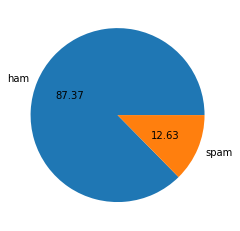

In [24]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels = ["ham","spam"], autopct = "%0.2f")

plt.show()

In [25]:
 import nltk 
    

In [26]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mtkta\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
#adding column with number of charecters 

df['char_count'] = df['text'].apply(len)
df.head(5)



C:\Users\mtkta\AppData\Local\Temp\ipykernel_17056\1500526199.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['char_count'] = df['text'].apply(len)


,target,text,char_count
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [28]:
#counting the number of words

df['word_count'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

df.head(5)

C:\Users\mtkta\AppData\Local\Temp\ipykernel_17056\1564830980.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word_count'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


,target,text,char_count,word_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [29]:
#counting sentances

df['sent_count'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head(5)

C:\Users\mtkta\AppData\Local\Temp\ipykernel_17056\343085997.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sent_count'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


,target,text,char_count,word_count,sent_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [51]:
df['text'].dtype


dtype('O')

In [49]:
df[['word_count','char_count','sent_count']].describe()

,word_count,char_count,sent_count
count,5169.000000,5169.000000,5169.000000
mean,18.453279,78.977945,1.947185
std,13.324793,58.236293,1.362406
min,1.000000,2.000000,1.000000
25%,9.000000,36.000000,1.000000
50%,15.000000,60.000000,1.000000
75%,26.000000,117.000000,2.000000
max,220.000000,910.000000,28.000000


In [31]:
#checking individually for ham 
df[df['target']==0][['word_count','char_count','sent_count']].describe()

,word_count,char_count,sent_count
count,4516.000000,4516.000000,4516.000000
mean,17.120903,70.459256,1.799601
std,13.493725,56.358207,1.278465
min,1.000000,2.000000,1.000000
25%,8.000000,34.000000,1.000000
50%,13.000000,52.000000,1.000000
75%,22.000000,90.000000,2.000000
max,220.000000,910.000000,28.000000


In [32]:
#checing for spam
df[df['target']==1][['word_count','char_count','sent_count']].describe()

,word_count,char_count,sent_count
count,653.000000,653.000000,653.000000
mean,27.667688,137.891271,2.967841
std,7.008418,30.137753,1.483201
min,2.000000,13.000000,1.000000
25%,25.000000,132.000000,2.000000
50%,29.000000,149.000000,3.000000
75%,32.000000,157.000000,4.000000
max,46.000000,224.000000,8.000000


In [33]:
#visualizing withistogram
import  seaborn as sns


<AxesSubplot:xlabel='char_count', ylabel='Count'>

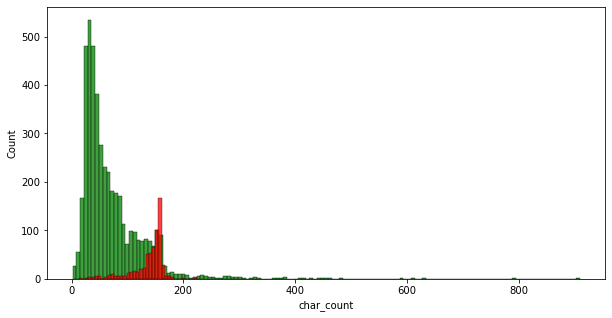

In [34]:
plt.figure(figsize = (10,5))


sns.histplot(df[df['target']==0]['char_count'], color = 'green')
sns.histplot(df[df['target']==1]['char_count'], color = 'red')


<AxesSubplot:xlabel='word_count', ylabel='Count'>

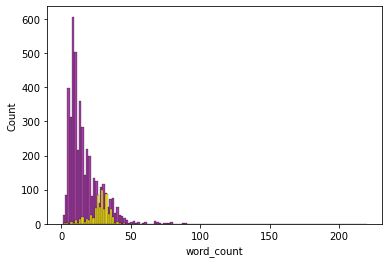

In [35]:
#doing the same for words 
sns.histplot(df[df['target']==0]['word_count'], color = 'purple')
sns.histplot(df[df['target']==1]['word_count'], color = 'yellow')


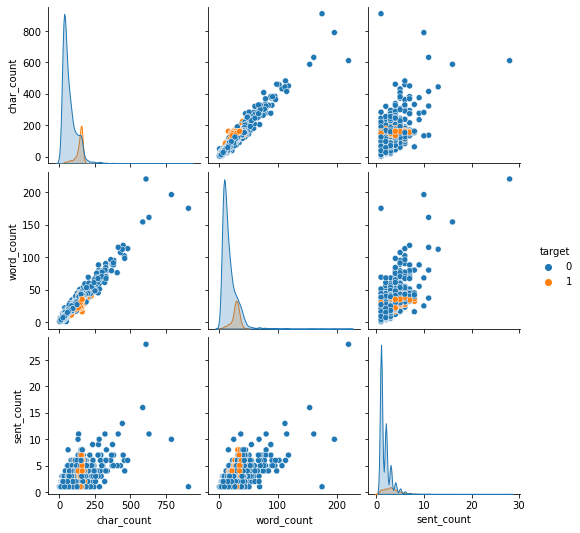

In [36]:
sns.pairplot(df, hue = 'target')

<AxesSubplot:>

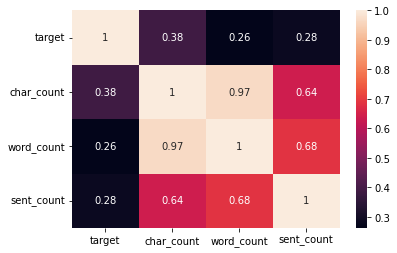

In [37]:
df.corr()
sns.heatmap(df.corr(), annot = True)

data preprocessing:-


In [38]:
#stop words in english language
from nltk.corpus import stopwords
import string


nltk.download('stopwords')
#stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mtkta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [39]:
#stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('trying')

'tri'

In [62]:
#DATA preprocessing

def transform_text(text:str):
    text = text.lower() #making lower case
    text = nltk.word_tokenize(text)   #converting to tokens
    
    #to remove special char use for loop
    temp = [] #list
    for i in text:
        if i.isalnum():
            temp.append(i)
    
    text = temp[:]
    temp.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            temp.append(i)
            
    text = temp[:]
    temp.clear()
    
    for i in text:
        temp.append(ps.stem(i))
            
    return temp

In [63]:
transform_text('hello trying !!!1 how are you ????? TALHA KHAN @@ # 1')

['hello', 'tri', '1', 'talha', 'khan', '1']

In [64]:
#for eg 
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [55]:
transform_text(df['text'][0])

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat']

In [56]:
df['text'].apply(transform_text)

0       [go, jurong, point, crazi, avail, bugi, n, gre...
1                            [ok, lar, joke, wif, u, oni]
2       [free, entri, 2, wkli, comp, win, fa, cup, fin...
3           [u, dun, say, earli, hor, u, c, alreadi, say]
4            [nah, think, goe, usf, live, around, though]
                              ...                        
5567    [2nd, time, tri, 2, contact, u, pound, prize, ...
5568                          [b, go, esplanad, fr, home]
5569                                [piti, mood, suggest]
5570    [guy, bitch, act, like, interest, buy, someth,...
5571                                   [rofl, true, name]
Name: text, Length: 5169, dtype: object

In [57]:
df['transformed_text'] = df['text'].apply(transform_text)
df.head(5)

C:\Users\mtkta\AppData\Local\Temp\ipykernel_17056\276213393.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(transform_text)


,target,text,char_count,word_count,sent_count,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, jurong, point, crazi, avail, bugi, n, gre..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar, joke, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"[nah, think, goe, usf, live, around, though]"


In [40]:
df['transformed_text'] = df['transformed_text'].astype(str)

C:\Users\mtkta\AppData\Local\Temp\ipykernel_3624\4073745127.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['transformed_text'].astype(str)


In [41]:
#generating wordcloud

from wordcloud import WordCloud

wc = WordCloud(width = 600, height = 600, background_color = 'black', min_font_size = 10)



In [42]:
spam_wc = wc.generate(df[df['target']== 1]['transformed_text'].str.cat(sep = " "))

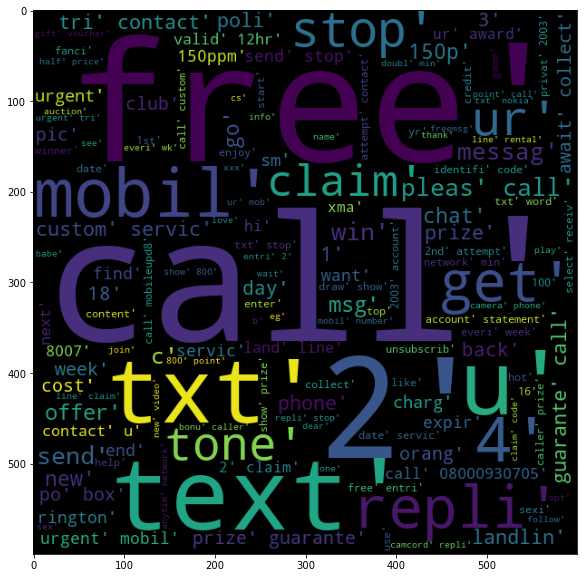

In [43]:
plt.figure(figsize =(10,10))
plt.imshow(spam_wc)
plt.show()

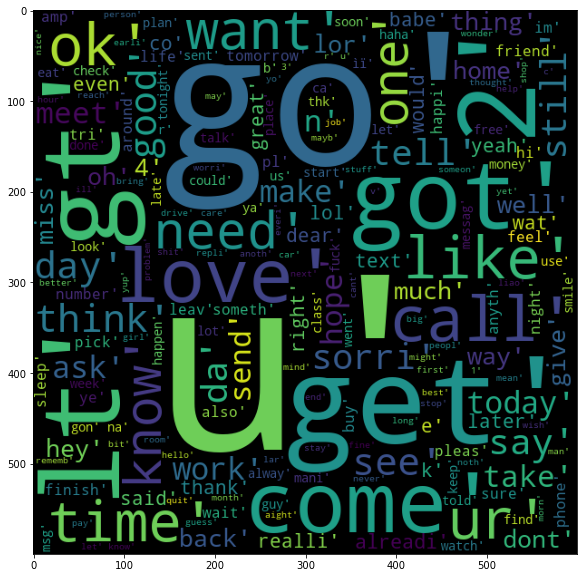

In [44]:
#worldcloud for ham messages 

spam_wc = wc.generate(df[df['target']== 0]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize =(10,10))
plt.imshow(spam_wc)
plt.show()

In [45]:
#finding the top 10 words in spam 
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        
from collections import Counter
Counter(spam_corpus).most_common(10)        


[("'call',", 305),
 ("'free',", 158),
 ("'2',", 154),
 ("'txt',", 137),
 ("'text',", 118),
 ("'mobil',", 106),
 ("'u',", 99),
 ("'repli',", 99),
 ("'ur',", 99),
 ("'claim',", 96)]

In [46]:
len(spam_corpus)

9939

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


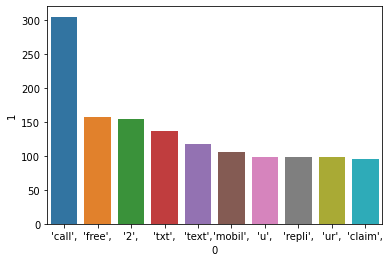

In [47]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(10))[0],pd.DataFrame(Counter(spam_corpus).most_common(10))[1])

#plt.xticks(rotation = 'vertical')

plt.show()

In [48]:
#finding the top 20 words in ham 
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
        
from collections import Counter
Counter(ham_corpus).most_common(10)      


[("'u',", 717),
 ("'go',", 353),
 ("'get',", 295),
 ("'lt',", 271),
 ("'2',", 270),
 ("'gt',", 242),
 ("'come',", 205),
 ("'like',", 196),
 ("'got',", 186),
 ("'ur',", 185)]

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


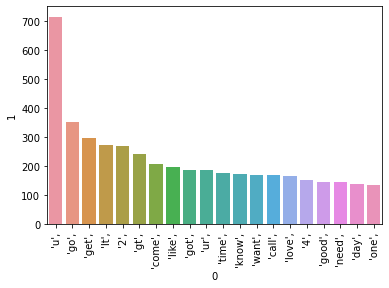

In [49]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(20))[0],pd.DataFrame(Counter(ham_corpus).most_common(20))[1])

plt.xticks(rotation = 'vertical')

plt.show()

building model using navies bayes :-


In [50]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tf = TfidfVectorizer(max_features = 3000) #to imporve the model we can only consider the 3000 most common words instead of all 6000

In [51]:
# using tfidf vectorizer instead of count vectorizer 
# if we use cv - x = cv.fit_transform(df['transformed_text']).toarray() 


x = tf.fit_transform(df['transformed_text']).toarray() 

In [52]:
#scaing


#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#x = scaler.fit_transform(x)

In [53]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [54]:
x.shape

(5169, 3000)

In [55]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state= 2)

In [58]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()


checking performance of different methods 


In [59]:
#performance of gaussian nb 
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)

print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [60]:
#performance of multinomialnb


mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)


print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [61]:
#performance of bernouli nb


bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)


print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [62]:
import pickle

pickle.dump(tf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))